In [13]:
# Paul Barrett
# Tiny Image Classification problem

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

## Load the data

In [14]:
base_dir = 'C:\\Users\\Paul\\Google Drive\\2018 Fall\\CS460G\\Notebooks\\assignment5data\\';

# load features, ignore header, ignore IDs
X_train = np.loadtxt(base_dir + 'train_features.csv', delimiter=',')[:,1:];
X_test = np.loadtxt(base_dir + 'test_features.csv', delimiter=',')[:,1:];
y_train = np.loadtxt(base_dir + 'train_labels.csv', dtype=np.uint8, delimiter=',', skiprows=1)[:,-1];

## Visualize the Images

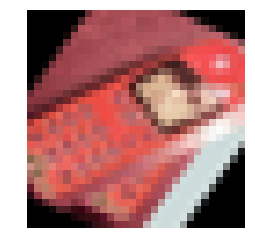

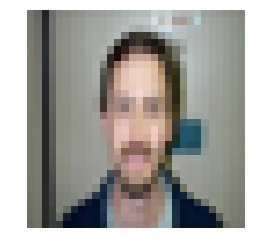

In [5]:
im_train = X_train[0,:].reshape((30,30,3), order='F')
im_test = X_test[0,:].reshape((30,30,3), order='F')

plt.figure(1)
plt.imshow(im_train/255)
plt.axis('off')

plt.figure(2)
plt.imshow(im_test/255)
plt.axis('off');

## Split Data for Parameter Search

In [15]:
#split data in half, random state off
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.5, random_state=0)

## Make a KNN submission

In [10]:
clf = KNeighborsClassifier(n_jobs=-1)
clf.fit(X_train, y_train)
df = pd.DataFrame(clf.predict(X_test), columns=['Label'])
df.index += 1 # upgrade to one-based indexing
df.to_csv('PaulBarrett_KNN_submission.csv',index_label='ID',columns=['Label'])

## Find Best Random Forest Parameters

In [28]:
#build a classifier
clf = RandomForestClassifier()

param_dist = {"n_estimators": sp_randint(150, 350),
              "max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "random_state": [True, False],
              "criterion": ["gini", "entropy"]}

n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

random_search.fit(X_train_split, y_train_split)
print("Best params: ", random_search.best_params_); print()

y_true, y_pred = y_test_split, random_search.predict(X_test_split)

print("Classification report: "); print()
print(classification_report(y_true, y_pred))

Best params:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_split': 4, 'n_estimators': 319, 'random_state': True}

Classification report: 

             precision    recall  f1-score   support

          1       0.64      0.86      0.73        43
          2       0.64      0.94      0.76        36
          3       0.58      0.87      0.69        38
          4       0.68      0.90      0.77        30
          5       0.52      0.75      0.61        44
          6       0.60      0.17      0.26        18
          7       0.00      0.00      0.00        26
          8       0.00      0.00      0.00        27
          9       0.17      0.03      0.06        29
         10       0.21      0.15      0.18        20
         11       1.00      0.28      0.43        18
         12       0.38      0.47      0.42        40
         13       0.69      0.55      0.61        56
         14       0.19      0.15      0.17        20
         15   

C:\Users\Paul\Miniconda3\envs\cs460g\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Make Random Forest Submission Using Best Parameters

In [29]:
RandForestclf = RandomForestClassifier(n_estimators = 319, random_state = True, max_depth = None, bootstrap = False, criterion = "entropy", min_samples_split = 5, max_features = 2)
RandForestclf.fit(X_train, y_train)
df = pd.DataFrame(RandForestclf.predict(X_test), columns=['Label'])
df.index += 1 # upgrade to one-based indexing
df.to_csv('PaulBarrett_RandForest_submission.csv',index_label='ID',columns=['Label'])

## Find Best Multi Layer Perceptron Parameters

In [ ]:
#build a classifier
clf = MLPClassifier()

param_dist = {"max_iter": sp_randint(150, 220),
              "solver": ['sgd', 'lbfgs', 'adam']}

n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

random_search.fit(X_train_split, y_train_split)
print("Best params: ", random_search.best_params_); print()

y_true, y_pred = y_test_split, random_search.predict(X_test_split)

print("Classification report: "); print()
print(classification_report(y_true, y_pred))

C:\Users\Paul\Miniconda3\envs\cs460g\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (181) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paul\Miniconda3\envs\cs460g\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (182) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paul\Miniconda3\envs\cs460g\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (182) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paul\Miniconda3\envs\cs460g\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (202) reached and the optimization h

Traceback (most recent call last):
  File "C:\Users\Paul\Miniconda3\envs\cs460g\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-38-49604bd3f5f5>", line 11, in <module>
    random_search.fit(X_train_split, y_train_split)
  File "C:\Users\Paul\Miniconda3\envs\cs460g\lib\site-packages\sklearn\model_selection\_search.py", line 639, in fit
    cv.split(X, y, groups)))
  File "C:\Users\Paul\Miniconda3\envs\cs460g\lib\site-packages\sklearn\externals\joblib\parallel.py", line 779, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\Paul\Miniconda3\envs\cs460g\lib\site-packages\sklearn\externals\joblib\parallel.py", line 625, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Paul\Miniconda3\envs\cs460g\lib\site-packages\sklearn\externals\joblib\parallel.py", line 588, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\Pa

KeyboardInterrupt: 

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "C:\Users\Paul\Miniconda3\envs\cs460g\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Paul\Miniconda3\envs\cs460g\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Paul\Miniconda3\envs\cs460g\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Paul\Miniconda3\envs\cs460g\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Paul\Miniconda3\envs\cs460g\lib\site-packages\ipykernel\kernelbase.py", line 408, in execute_request
    time.sleep(self._execute_sleep)
KeyboardInterrupt


# Make Multi Layer Perceptron Submission using Best Parameters

In [ ]:
MLPclf = RandomForestClassifier(n_estimators = 319, random_state = True, max_depth = None, bootstrap = False, criterion = "entropy", min_samples_split = 5, max_features = 2)
MLPclf.fit(X_train, y_train)
df = pd.DataFrame(MLPclf.predict(X_test), columns=['Label'])
df.index += 1 # upgrade to one-based indexing
df.to_csv('PaulBarrett_MLP_submission.csv',index_label='ID',columns=['Label'])